In [1]:
import pandas as pd
import numpy as np
path='https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df.dtypes
df['peak-rpm'].dtypes
df.corr()
df[['bore','stroke','compression-ratio','horsepower','price']].corr()

,bore,stroke,compression-ratio,horsepower,price
bore,1.000000,-0.055390,0.001263,0.566936,0.543155
stroke,-0.055390,1.000000,0.187923,0.098462,0.082310
compression-ratio,0.001263,0.187923,1.000000,-0.214514,0.071107
horsepower,0.566936,0.098462,-0.214514,1.000000,0.809575
price,0.543155,0.082310,0.071107,0.809575,1.000000


C:\Users\Anuj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 56303.69798352408)

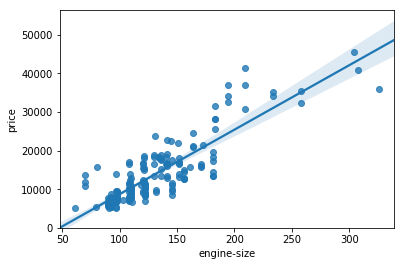

In [5]:
#engine size as potential predictor variable of price
sns.regplot(x='engine-size',y='price',data = df)
# y index is starting with negative values to limit it to 0, I am using below code
plt.ylim(0,)

In [6]:
# it is to show strong corelation between the engine size and price
df[['engine-size','price']].corr()
# for negative linear regression relationship

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


C:\Users\Anuj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


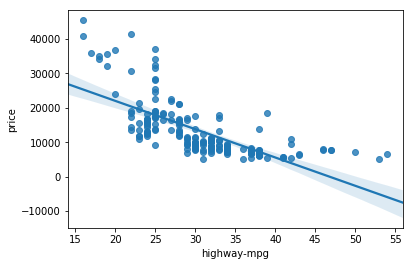

In [7]:
sns.regplot(x='highway-mpg',y='price', data=df)

In [8]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


C:\Users\Anuj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


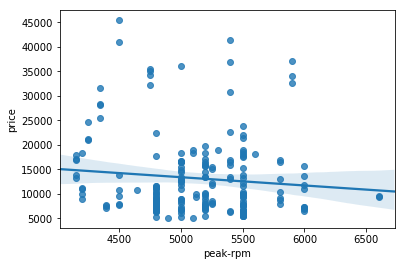

In [9]:
#weak relationship
sns.regplot(x='peak-rpm',y='price',data = df)
df[['peak-rpm','price']].corr()
#corelation is -0.1000... 
#which shows no relation between these factors


C:\Users\Anuj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


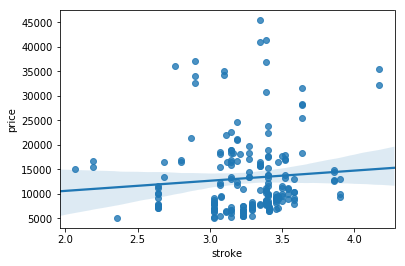

In [10]:

#correlation between stroke and price
sns.regplot(x='stroke',y='price', data=df)
df[['stroke','price']].corr()

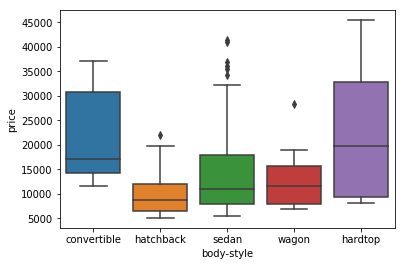

In [12]:
#categorical variable
sns.boxplot(x='body-style',y='price',data=df)

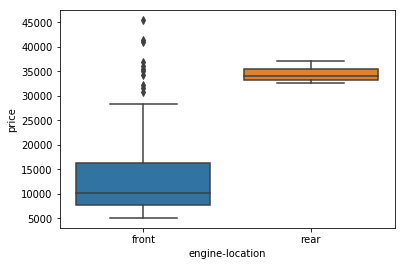

In [13]:
sns.boxplot(x='engine-location',y='price',data=df)


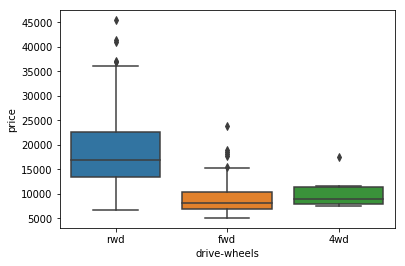

In [14]:
sns.boxplot(x='drive-wheels',y='price', data=df)

In [16]:
# descriptive statistics , skips nan and object type
df.describe()  # don't include the object type 

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [17]:

df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [21]:
#Value counts function is used to count values and it works on pandas series not pandas dataframe
df['drive-wheels'].value_counts()
df['drive-wheels'].value_counts().to_frame() # to convert into data frame

drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns = {'drive-wheel':"value-counts"},inplace = True) #renaming

drive_wheel_counts.index.name = 'drive-wheel'
drive_wheel_counts

,drive-wheels
drive-wheel,
fwd,118
rwd,75
4wd,8


In [20]:


# Now doing same with engine-location variable

engine_location_count = df['engine-location'].value_counts().to_frame()
engine_location_count.rename(columns = {'engine-location':'value-counts'}, inplace = True)
engine_location_count.index.name= 'engine-location'
engine_location_count



,value-counts
engine-location,
front,198
rear,3


In [23]:
#Basic of Grouping

df['drive-wheels'].unique()
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'], as_index = False).mean()
df_group_one # showing table

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [27]:
#grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'], as_index =False).mean()
grouped_test1 # showing table with both variable grouped 

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [28]:
#Now we will visualise same thing as above in pivot table.
grouped_pivot = grouped_test1.pivot(index ='drive-wheels', columns = 'body-style')
grouped_pivot #showing table


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [29]:
#Replacing nan with 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [30]:
#Doung same with body type
group_bodytable = df[['body-style','price']]
groupt = group_bodytable.groupby('body-style', as_index = True).mean()
groupt

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


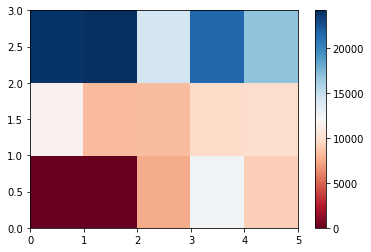

In [35]:
#now to show heat maps
plt.pcolor(grouped_pivot,cmap = 'RdBu')
plt.colorbar()
plt.show()


In [ ]:
#but we cannot understand anything from these labels so below code is just to indroduce labels and format them properly.
# I have not spend too much time in that I am just copy pasting it from somewhere

fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
#ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
#ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
#Correlation and Causation
#It is important to know the difference between these two and that correlation does not imply causation.
#Determining correlation is much simpler than determining causation, as causation may require independent experimentation.

#Pearson correlation
#Pearson Correlation is the default method of the function "corr". 1: total positive linear correlation,
#0: no linear correlation,
#-1: total negative linear correlation.

df.corr()

# for P-value
#<0.001 strong
#<0.05 moderate
#<0.1 weak
#>0.1 no evidence of correlation

In [36]:
# Let's import scipy package for stats
from scipy import stats
#Wheelbase vs price
pearson_coef, p_value= stats.pearsonr(df['wheel-base'],df['price'])
print("The pearson coefficient is ", pearson_coef, "and the p value is ", p_value)

#horsepower
hpc, hpv = stats.pearsonr(df['horsepower'],df['price'])
#length
lpc, lpv = stats.pearsonr(df['length'],df['price'])
#Width
wpc, wpv = stats.pearsonr(df['width'],df['price'])
#curb-weight 
cpc, cpv = stats.pearsonr(df['curb-weight'],df['price'])
#similarly for engine-size, bore, city-mpg and highway-mpg
epc, epv = stats.pearsonr(df['engine-size'],df['price'])
bpc, bpv = stats.pearsonr(df['bore'],df['price'])
cmpc, cmpv = stats.pearsonr(df['city-mpg'],df['price'])
hmpc, hmpv = stats.pearsonr(df['highway-mpg'],df['price'])

#Let's print this all
print(epc, epv)
print(bpc, bpv )
print(cmpc, cmpv)
print(hmpc, hmpv)

The pearson coefficient is  0.5846418222655081 and the p value is  8.076488270732955e-20
0.8723351674455185 9.265491622197996e-64
0.5431553832626602 8.049189483935364e-17
-0.6865710067844677 2.3211320655676368e-29
-0.7046922650589529 1.7495471144476807e-31


# ANOVA- analysis of variance - Let me tell you this with the help of diagram. 
![title](low_f_dplot.webp)
# Now let me show you a diagram with high F value
![title](high_f_dplot.webp)

In [50]:
grouped_test2 = df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [48]:
# this function is used to get the values of only one group
grouped_test2.get_group('4wd')['price']
# now getting the value of f-test and p-value using function f_oneway
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
print("ANOVA f-test results: F= ", f_val,"P =", p_val)


ANOVA f-test results: F=  67.95406500780399 P = 3.3945443577151245e-23


In [49]:
df_gptest.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [51]:
# putting all relevant code into one cell to make it easy to understand.
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])

In [56]:
#f_val, p_val = stats.f_oneway(grouped_ test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
#print(f_val, "  ", p_val)
# to show you it  by making more simple
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], df[['drive-wheels','body-style','price']].groupby('drive-wheels').get_group('rwd')['price'])
print(f_val, " ", p_val)

130.5533160959111   2.2355306355677845e-23


In [57]:


# now doing it again to check again
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   



ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333
ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


# from above f-test, p-value and anova analysis we have found out that below variables are important
Continuous numerical variables:

Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore
Categorical variables:

Drive-wheels

This part is completed
